# 5장 우리나라 인구 소멸위기 지역 분석

### 인구소멸 위기지역:
* 65세 이상노인인구와 20~39세 여성 인구를 비교해 **젊은 여성 인구가 노인 인구의 절반에 미달할 경우 '소멸 위험 지역' 으로 분류** 하는 방식
    * 1.  국가통계포털(KOSIS)
    * https://kosis.kr/index/index.do

## 5-2. 인구 데이터 확보하고 정리하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import numpy as np

path = 'C:\Windows\Fonts\malgun.ttf'

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...')

In [2]:
population = pd.read_excel('../data/python_data/05. population_raw_data.xlsx', header = 1)
population 

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,NaN,NaN,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,NaN,NaN,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,NaN,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,NaN,NaN,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [14]:
population.rename(columns = {'항목': '구분'}, inplace = True)
population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0,63929.0,24084.0
842,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0,60255.0,35075.0
843,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0,39298.0,30030.0
844,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0,20622.0,12294.0


In [15]:
# 결측값을 앞 방향 혹은뒷 방향으로 채우기(fill gaps forward or backward)
# fillna(method = 'fill' or 'pad'), fillna(method='bfill' or 'backfill')
population.fillna(method = 'pad', inplace = True)

population.rename(columns = {'행정구역(동읍면)별(1)' : '광역시도', 
                            '행정구역(동읍면)별(2)': '시도',
                            '계': '인구수'}, inplace = True)
population = population[(population['시도'] != '소계')]
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0,63929.0,24084.0
842,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0,60255.0,35075.0
843,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0,39298.0,30030.0
844,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0,20622.0,12294.0


* 위 표를 보면 **항목**이라는 컬럼의 내용이 각 행정구역 마다 **총인구수, 남자인구수, 여자인구수**로 나눠있는 것을 알 수 있음
* 이를 지금 정리하기 위해 간단히 반복문(for)으로 **합계, 남자, 여자**로 변경하고 **구분**이라는 컬럼으로 저장함
* 그리고, **항목**을 지우기로 함

## 5-3. 인구 소멸 위기 지역 계산하고 데이터 정리하기

In [16]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']

population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                         population['75 - 79세'] + population['80 - 84세'] + \
                         population['85 - 89세'] + population['90 - 94세'] + \
                         population['95 - 99세'] + population['100+']

population.head(10)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


* pivot_table을 이용하여 광역시도, 시도를 index로 두고, 구분으로 세로를 첫 번째 컬럼을 잡고, value에 인구수, 20-39세, 65세 이상으로 정리해둔다. 

In [17]:
pop = pd.pivot_table(population, 
                     index = ['광역시도', '시도'], 
                     columns = ['구분'],
                    values = ['인구수', '20-39세', '65세이상'])
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

* **소멸비율**이라는 컬럼에 인구소멸위기지역을 계산하기 위한 식을 적용한다.
* 이 비율이 1보다 작으면 **인구소멸위기지역**으로 볼 수 있다. 

In [19]:
pop['소멸비율'] = pop['20-39세', '여자'] / (pop['65세이상', '합계'] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

* 소멸위기지역인지를 boolean으로 지정해둔다. 

In [20]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [21]:
# 다중 색인
# df.index.get_level_values('name_index')
pop[pop['소멸위기지역'] == True].index.get_level_values(0)

Index(['강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '경기도', '경기도',
       '경기도', '경상남도', '경상남도', '경상남도', '경상남도', '경상남도', '경상남도', '경상남도', '경상남도',
       '경상남도', '경상남도', '경상남도', '경상북도', '경상북도', '경상북도', '경상북도', '경상북도', '경상북도',
       '경상북도', '경상북도', '경상북도', '경상북도', '경상북도', '경상북도', '경상북도', '경상북도', '경상북도',
       '경상북도', '부산광역시', '부산광역시', '인천광역시', '인천광역시', '전라남도', '전라남도', '전라남도',
       '전라남도', '전라남도', '전라남도', '전라남도', '전라남도', '전라남도', '전라남도', '전라남도', '전라남도',
       '전라남도', '전라남도', '전라남도', '전라남도', '전라북도', '전라북도', '전라북도', '전라북도', '전라북도',
       '전라북도', '전라북도', '전라북도', '전라북도', '전라북도', '충청남도', '충청남도', '충청남도', '충청남도',
       '충청남도', '충청남도', '충청남도', '충청남도', '충청남도', '충청남도', '충청북도', '충청북도', '충청북도',
       '충청북도', '충청북도'],
      dtype='object', name='광역시도')

In [22]:
pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

* pivot_table 로 잘 정리된 상태에서 **.reset_index**로 pivot_table의 result속성을 다시 설정한다. 

In [24]:
pop.reset_index(inplace = True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [25]:
print(pop.columns.get_level_values(0))
print(pop.columns.get_level_values(1))

Index(['광역시도', '시도', '20-39세', '20-39세', '20-39세', '65세이상', '65세이상', '65세이상',
       '인구수', '인구수', '인구수', '소멸비율', '소멸위기지역'],
      dtype='object')
Index(['', '', '남자', '여자', '합계', '남자', '여자', '합계', '남자', '여자', '합계', '', ''], dtype='object', name='구분')


In [26]:
len(pop.columns.get_level_values(0))
len(pop.columns.get_level_values(1))    #개수가 둘이 맞아야한다

13

* 이중 column을 해제하기위해 두 컬럼제목을 합쳐 다시 지정한다. 

In [29]:
tmp_columns = [pop.columns.get_level_values(0)[n] + \
              pop.columns.get_level_values(1)[n]
              for n in range(0, len(pop.columns.get_level_values(0)))]
pop.columns = tmp_columns
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [30]:
pop.info()   #잘 분리되었다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


## 5-5. 지도 시각화를위해 지역별 고유 ID 만들기

In [31]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

* 지도데이터의 시도이름(05. draw_korea_raw.xlsx)과 위의 데이터의 시도이름이 일치하지 않기 때문에 일치하도록 바꿔준다. 
* '../data/python_data/05. draw_korea_raw.xlsx'

In [32]:
si_name = [None] * len(pop)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
               '성남':['수정구', '중원구', '분당구'],
               '안양':['만안구', '동안구'],
               '안산':['상록구', '단원구'],
               '고양':['덕양구', '일산동구', '일산서구'],
               '용인':['처인구', '기흥구', '수지구'],
               '청주':['상당구', '서원구', '흥덕구', '청원구'],
               '천안':['동남구', '서북구'],
               '전주':['완산구', '덕진구'],
               '포항':['남구', '북구'],
               '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
               '부천':['오정구', '원미구', '소사구']}

In [33]:
# 인천, 부산 등  광역시 --> 자치구
# 안양시, 수원시 --> 행정구
pop[pop['시도'] == '분당구']   #성남시 분당구로 되어있어야하는데 경기도 분당구로 되어있음. 이런 데이터를걸ㄹ야함

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
35,경기도,분당구,72407.0,77174.0,149581.0,21745.0,29118.0,50863.0,244502.0,259328.0,503830.0,3.034583,False


In [34]:
pop[pop['시도'] == '만안구']

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
33,경기도,만안구,39518.0,36093.0,75611.0,13369.0,16935.0,30304.0,126793.0,125560.0,252353.0,2.382062,False


In [35]:
pop[pop['시도'] == '상록구']

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
36,경기도,상록구,60302.0,53671.0,113973.0,13411.0,19209.0,32620.0,191479.0,184378.0,375857.0,3.290681,False


In [36]:
pop[pop['시도'] == '중구']

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
129,대구광역시,중구,11586.0,11124.0,22710.0,6272.0,9071.0,15343.0,38720.0,40992.0,79712.0,1.450042,False
134,대전광역시,중구,33905.0,32108.0,66013.0,16629.0,21839.0,38468.0,125383.0,127107.0,252490.0,1.669336,False
149,부산광역시,중구,5934.0,5300.0,11234.0,4069.0,5631.0,9700.0,22174.0,23034.0,45208.0,1.092784,False
174,서울특별시,중구,19347.0,18837.0,38184.0,8852.0,11536.0,20388.0,62204.0,63045.0,125249.0,1.847852,False
181,울산광역시,중구,36515.0,31292.0,67807.0,11523.0,14559.0,26082.0,123702.0,118834.0,242536.0,2.399509,False
191,인천광역시,중구,16671.0,14731.0,31402.0,6894.0,8843.0,15737.0,59839.0,55410.0,115249.0,1.872148,False


In [38]:
for n in pop.index:
    if pop['광역시도'][n][-3: ] not in ['광역시', '특별시', '자치시']:    # 광역시,특별시,자치시가 아닐 때 돌아가는 부분
        if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][:-1]
        
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:         # keys values
                if len(pop['시도'][n]) == 2:       # '포항': ['남구','북구']
                    si_name[n] = keys + ' ' + pop['시도'][n]  #포항 남구
                elif pop['시도'][n] in ['마산합포구', '마산회원구']:   # '창원': ['마산합포구', '마산회원구']
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]   #창원 합포
                else:   # '안양' : ['만안구', '동안구']
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]    # 안양 만안
    elif pop['광역시도'][n] == '세종특별자치시':
                si_name[n] = '세종'
    else:                                                                 # 광역시,특별시,자치시일 때 돌아가는 부분
        if len(pop['시도'][n]) == 2:   #서울특별시 중구. 시*도가 두글자일때
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]   #서울 중구
        else:   #서울특별시 구로구
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]   #서울 구로
            

In [39]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

* 지도 시각화에 사용하기위해 위 과정에서 만들어진 행정구역의 고유한 이름을 ID로 지정한다. 

In [40]:
pop['ID'] = si_name

In [41]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

In [42]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


## 5-6. Cartogram으로 우리나라 지도만들기

In [45]:
draw_korea_raw = pd.read_excel('../data/python_data/05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


* 이제 각 행정 구역의 화면상 좌표를 얻기 위해 pivot_table의 반대 개념으로 **.stack()** 명령을 사용한다.

In [47]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace = True)
draw_korea_raw_stacked.rename(columns = {'level_0': 'y', 'level_1': 'x', 0:'ID'}, inplace = True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


원본 엑셀파일을 보면 x축이 7이고 y축이 0일 때가 철원이고, x축이 8이고 y축이 0일 때 화천이다. 이런 식으로 값을 가져온다. 

* 다시 인덱스를 재설정하고 컬럼이름을 다시 설정해준다. 

In [48]:
draw_korea = draw_korea_raw_stacked

* 먼저 ID 컬럼에서 지도에 표기할 때 시 이름 구 이름으로 줄을 나누기 위해 분리한다.

In [49]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9),
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7),
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4),
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5),
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6),
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)],
    [(27,5), (27,6), (25,6)],
]

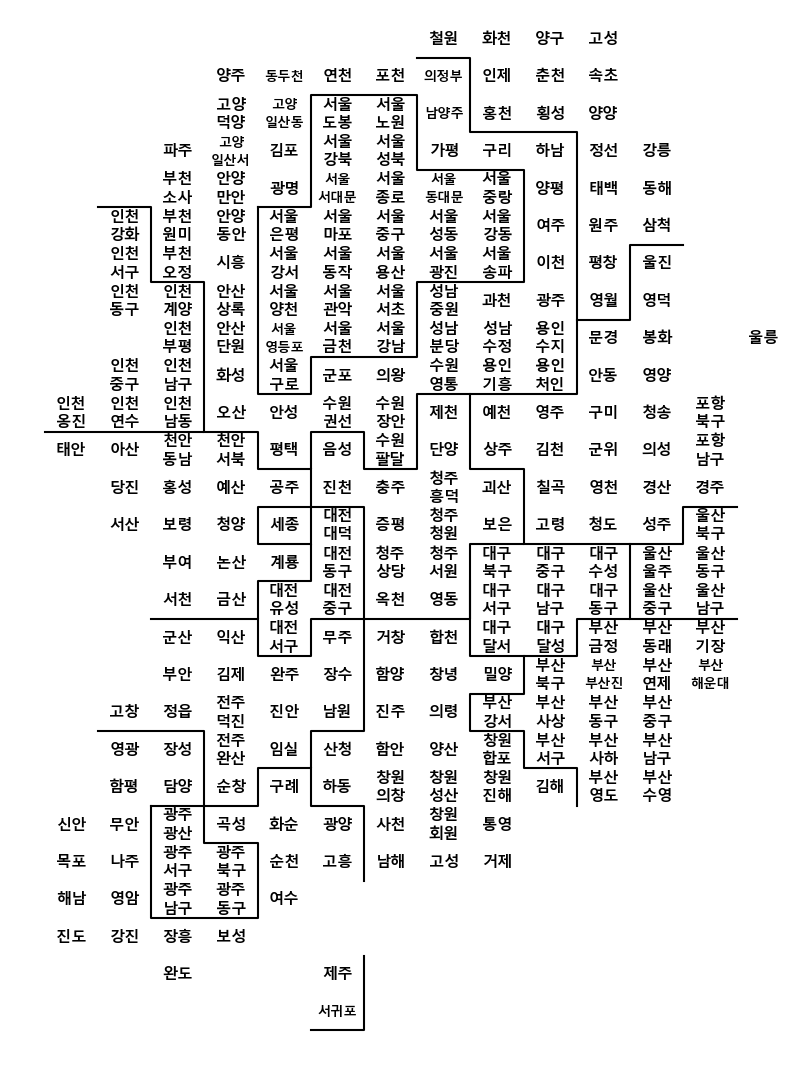

In [50]:
plt.figure(figsize=(8, 11))
# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']
    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center',
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)
plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)
plt.axis('off')
plt.tight_layout()
plt.show()

* 지도데이터 참고한 깃허브
https://goo.gl/xi5pKD

* 인구에 대한 분석결과인 pop과 지도를 그리기 위한 draw_korea의 데이터를 합칠 때 사용할 key인 ID컬럼의 내용이 문제가 없는지 확인하자

In [52]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())     # set()은 값이 없다는 의미 

set()

In [53]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())   
# 인구데이터에서 지도데이터를 뺐더니값이 있다-> 지도에 표시되지 않은 인구데이터가 있다. 

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

* 위 결과에 따르면, pop에 행정구를 가진 시들의 데이터가 더 있다는 것을 알 수 있다. 
* 어차피 지도에서는 표시되지 못하니 삭제한다. 

In [55]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index)
    
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


In [56]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


* 이제 pop과 draw_korea의 ID컬럼이 일치했다고 보고, ID를 key로 merge를 시키도록 한다. 

In [58]:
pop=pd.merge(pop, draw_korea, how = 'left', on=['ID'])
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


* 이제 위 pop 데이터에서 지도에 표현하고자 하는 데이터가 **인구수합계**라면 이 값들이 아까 만든 각 해당 행정구역에 위치하면 된다. 

In [59]:
mapdata = pop.pivot_table(index = 'y', columns = 'x', values = '인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [60]:
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [61]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, 48013.0, 26264.0, 24010.0, 30114.0,
         --, --, --],
        [--, --, --, 205513.0, 98277.0, 45907.0, 154763.0, 438457.0,
         32720.0, 280707.0, 81793.0, --, --, --],
        [--, --, --, 446233.0, 292612.0, 348220.0, 567581.0, 662154.0,
         70076.0, 45991.0, 27218.0, --, --, --],
        [--, --, 430781.0, 300839.0, 363443.0, 327195.0, 450355.0,
         62448.0, 193763.0, 211101.0, 38718.0, 213846.0, --, --],
        [--, --, 283793.3333333333, 252353.0, 339484.0, 314194.0,
         152737.0, 355069.0, 411005.0, 111367.0, 47070.0, 93297.0, --,
         --],
        [--, 68010.0, 283793.3333333333, 345061.0, 491476.0, 379892.0,
         125249.0, 299259.0, 444168.0, 111563.0, 337979.0, 69599.0, --,
         --],
        [--, 510733.0, 283793.3333333333, 402888.0, 595485.0, 400997.0,
         230241.0, 357215.0, 657831.0, 210359.0, 43318.0, 51738.0, --,
         --],
        [--, 71014.0, 330284.0, 375857.0, 477739.0, 50

* 위 내용과 colormap을 완성하는 코드

In [62]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75
    whitelabelmin = (max(blockedMap[targetData]) -
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname,
               edgecolor='#AAAAAA', linewidth=0.5)
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    plt.tight_layout()
    plt.show()

## 5-7. 인구 현황 및 인구 소멸 지역 확인하기

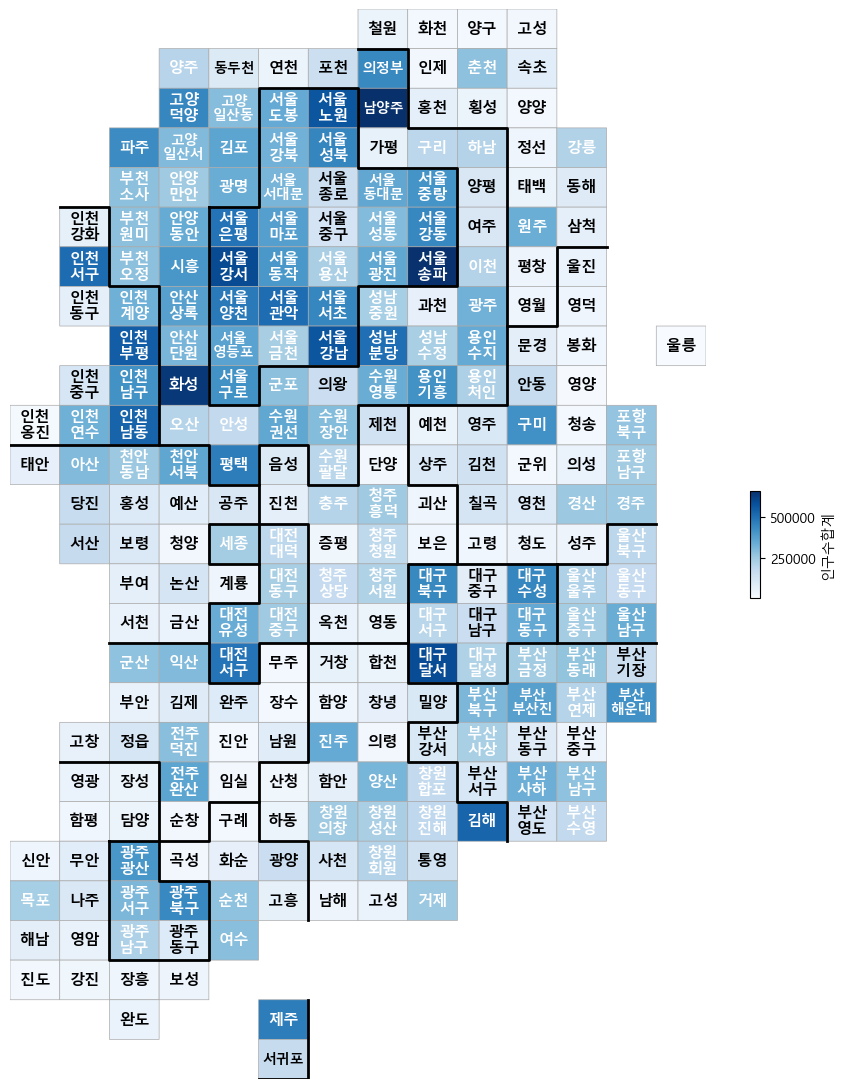

In [63]:
drawKorea('인구수합계', pop, 'Blues')

* 인구 소멸 위기 지역에 대한 표현

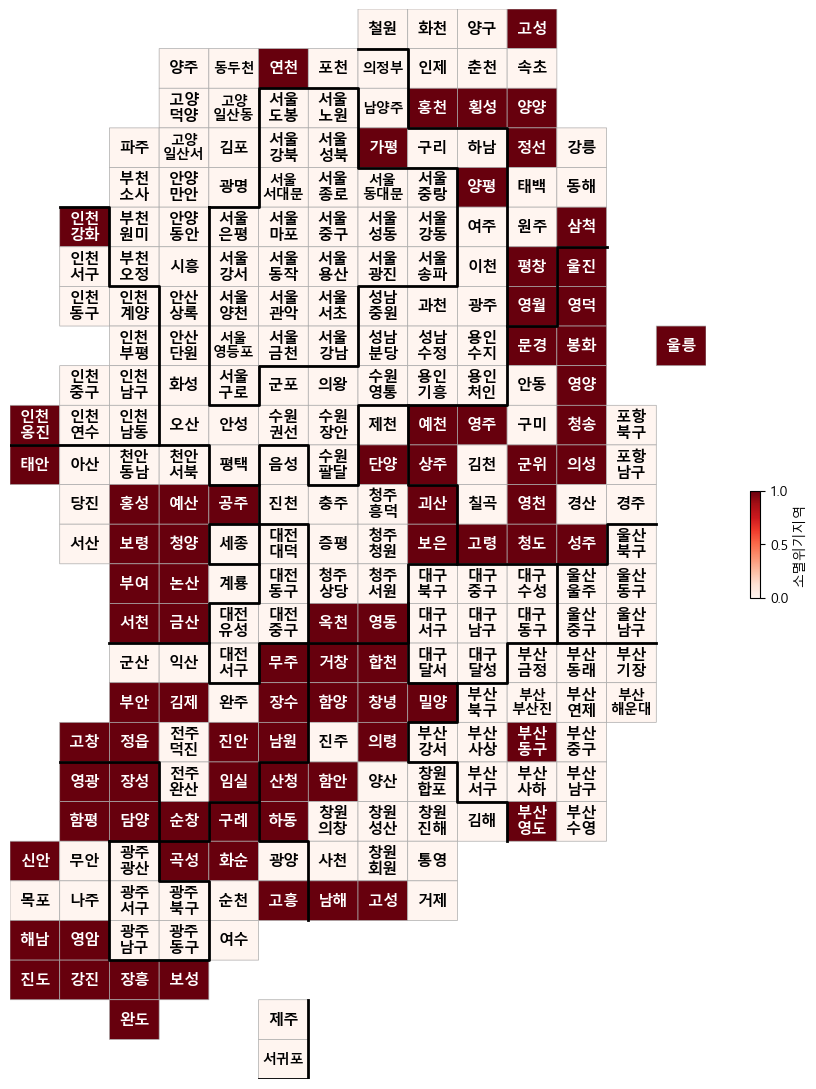

In [64]:
pop['소멸위기지역'] =[1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

* 지도 json 파일 구글검색하여 사용가능<br>
https://yeomss.tistory.com/267

In [65]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75
    whitelabelmin = 20.
    datalabel = targetData
    tmp_max = max([ np.abs(min(blockedMap[targetData])),
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname,
               edgecolor='#AAAAAA', linewidth=0.5)
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.
        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    plt.tight_layout()
    plt.show()

In [66]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,속초,1,10


In [68]:
# 강원도 강릉시
(107615.0/213846.0 - 0.5)*100

0.32359735510600895

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26640\3161400959.py:40: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


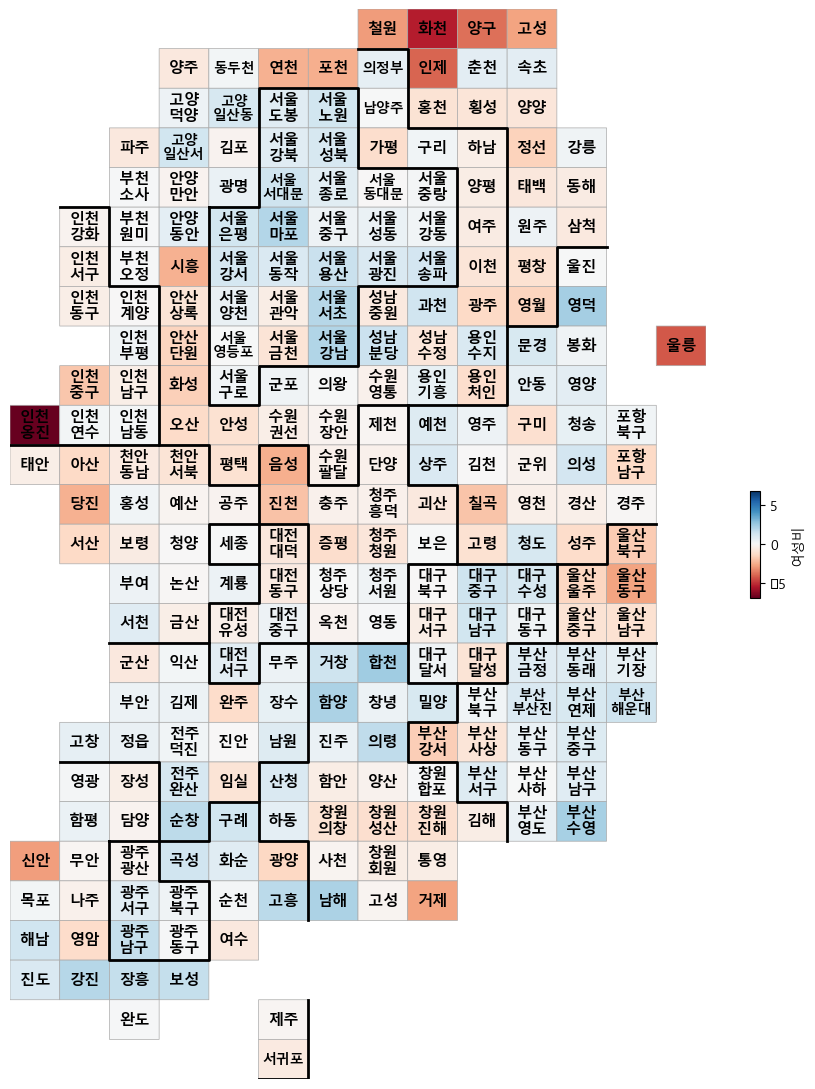

In [69]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5) *100
drawKorea('여성비', pop, 'RdBu')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26640\3161400959.py:40: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


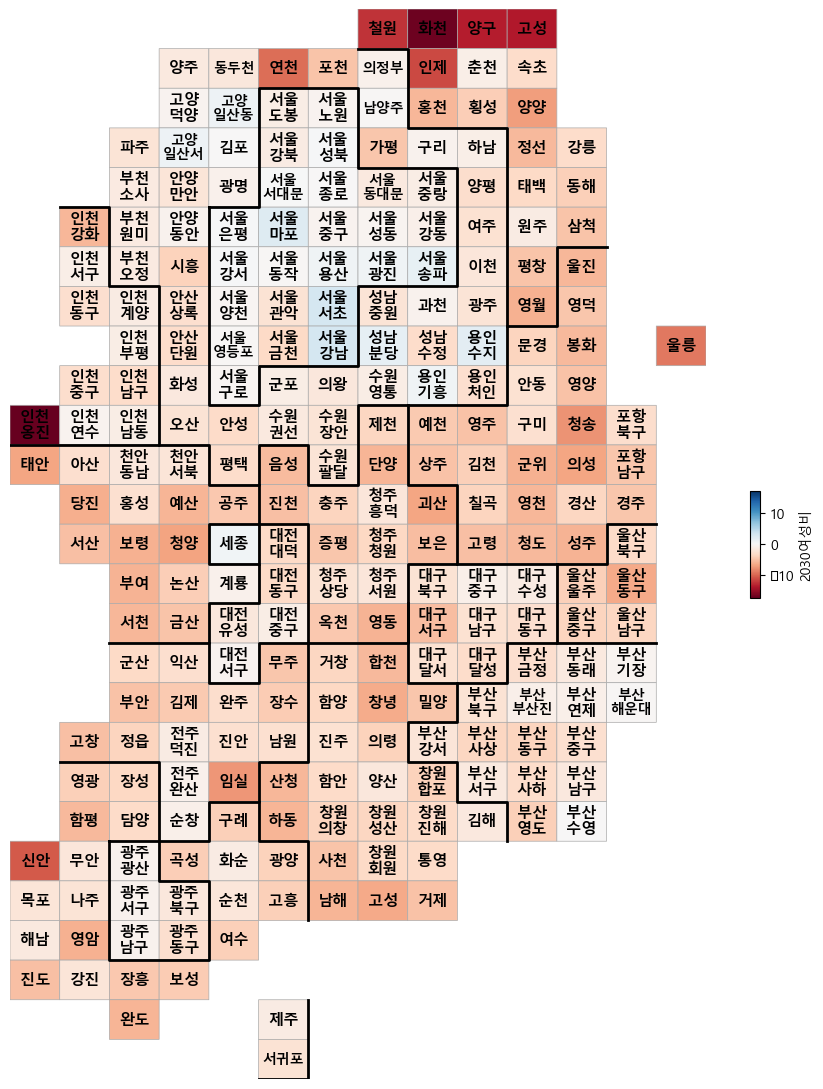

In [71]:
# 비율 0~1 사이의 값
# 중앙값 0.5를 기준으로 그보다 작으면 음수, 더 크면 양수로 표현하려고 0.5를 뺀 것임.
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5) *100
drawKorea('2030여성비', pop, 'RdBu')

## 5-9. 

In [72]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,-3.227766,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-13.989748,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-4.133747,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-5.033812,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,-3.217875,-3.217875


In [75]:
import folium
import json
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [76]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,-3.227766,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-13.989748,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-4.133747,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-5.033812,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,-3.217875,-3.217875


In [77]:
geo_path = '../data/python_data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
map = folium.Map(location = [37.5502, 126.982], zoom_start = 7)

map.choropleth(geo_data = geo_str, 
              data = pop_folium['인구수합계'], 
              columns = [pop_folium.index, pop_folium['인구수합계']],
              fill_color = 'PuRd',
              key_on = 'feature.id')
map

In [79]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 7)

map.choropleth(geo_data = geo_str, 
              data = pop_folium['소멸위기지역'], 
              columns = [pop_folium.index, pop_folium['소멸위기지역']],
              fill_color = 'Set1',
              key_on = 'feature.id')
map

In [80]:
draw_korea.to_csv('../data/python_data/05. draw_korea.csv', encoding = 'utf-8', sep=',')